# **EMOTION AI**

**Integrantes**

- Jose Luis Soto - 2181583
-  Daniel Alejandro Castillo - 2180064
- Jhon Anderson Ramirez - 2180076


# Preparación del dataset

In [ ]:
#@title **Imports**

import pandas as pd
import numpy as np
import cv2
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import *

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
#@title **Descarga del dataset**
url = 'https://gitlab.com/gitlab-god/emotion-ai/-/raw/master/data/icml_face_data.csv'
fe = pd.read_csv(url)

In [ ]:
#@title **Visualizando el dataset**
fe

emotion                                             pixels
0            0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1            0  151 150 147 155 148 133 111 140 170 174 182 15...
2            2  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
3            2  20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
4            3  77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...
...        ...                                                ...
24563        3  0 39 81 80 104 97 51 64 68 46 41 67 53 68 70 5...
24564        0  181 177 176 156 178 144 136 132 122 107 131 16...
24565        3  178 174 172 173 181 188 191 194 196 199 200 20...
24566        0  17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
24567        3  30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...

[24568 rows x 2 columns]

In [ ]:
#@title **Preprocesamiento del dataset**

fe[' pixels'][0] # Formato String

# Funcion para convertir valores de píxel de formato string a formato array 
def string2array(x):
  return np.array(x.split(' ')).reshape(48, 48, 1).astype('float32')

# Redimensionamos la imagen de (48, 48) a (96, 96)
def resize(x):
  
  img = x.reshape(48, 48)
  return cv2.resize(img, dsize=(96, 96), interpolation = cv2.INTER_CUBIC)

fe[' pixels'] = fe[' pixels'].apply(lambda x: string2array(x))
fe[' pixels'] = fe[' pixels'].apply(lambda x: resize(x))

from tensorflow.keras.utils import to_categorical

x = fe[' pixels']
y = fe['emotion']

x = np.stack(x, axis = 0)
x = x.reshape(24568, 9216)

print(x.shape, y.shape)

(24568, 9216) (24568,)


# Clasificadores Tradicionales

Uso de PCA debido a la alta dimensión de los datos presentes en dataset y al alto costo computacional generado al no realizar esta practica

In [ ]:
#@title **Gaussian Naive Bayes (PCA and Cross Validation)**

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

p = Pipeline((("pca", PCA(n_components=50)), ("classifier", GaussianNB()) ))
s = cross_val_score(p, x, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print( "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.456 (+/- 0.00614)


In [ ]:
#@title **SVC (PCA and Cross Validation)**

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

p = Pipeline((("pca", PCA(n_components=50)), ("classifier", SVC(kernel='rbf')) ))
s = cross_val_score(p, x, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print( "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.566 (+/- 0.01193)


In [ ]:
#@title **K Neighbors Classifier (PCA and Cross Validation)**

from sklearn.neighbors import KNeighborsClassifier

p = Pipeline((("pca", PCA(n_components=50)), ("classifier", KNeighborsClassifier(n_neighbors=5)) ))
s = cross_val_score(p, x, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print( "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.479 (+/- 0.00982)


In [ ]:
#@title **Decision Tree Classifier (PCA and Cross Validation)**

from sklearn.tree import DecisionTreeClassifier

p = Pipeline((("pca", PCA(n_components=50)), ("classifier", DecisionTreeClassifier(max_depth=100)) ))
s = cross_val_score(p, x, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print( "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.428 (+/- 0.01007)


In [ ]:
#@title **Random Forest Classifier (PCA and Cross Validation)**

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

p = Pipeline((("pca", PCA(n_components=50)), ("classifier", RandomForestClassifier()) ))
s = cross_val_score(p, x, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print( "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.569 (+/- 0.01063)


# CNN

In [ ]:
#@title **Imports**

import pandas as pd
import numpy as np
import os
import PIL
import seaborn as sns
import pickle
from PIL import *
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.python.keras import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

from tensorflow.keras.optimizers import Adam   

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, Input, BatchNormalization, MaxPooling2D, UpSampling2D, Dropout, BatchNormalization
#from keras.models import Model, load_model
from tensorflow.keras.models import Model, load_model   # tensorflow.keras
from tensorflow.keras.callbacks import ModelCheckpoint
from google.colab.patches import cv2_imshow 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from keras.optimizers import Adam               
from tensorflow.keras.optimizers import Adam     

In [ ]:
#@title **Descarga del dataset**

url = 'https://gitlab.com/gitlab-god/emotion-ai/-/raw/master/data/icml_face_data.csv'
facialexpression_df = pd.read_csv(url)

In [ ]:
#@title **Visualización dataset**

facialexpression_df

emotion                                             pixels
0            0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1            0  151 150 147 155 148 133 111 140 170 174 182 15...
2            2  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
3            2  20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
4            3  77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...
...        ...                                                ...
24563        3  0 39 81 80 104 97 51 64 68 46 41 67 53 68 70 5...
24564        0  181 177 176 156 178 144 136 132 122 107 131 16...
24565        3  178 174 172 173 181 188 191 194 196 199 200 20...
24566        0  17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
24567        3  30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...

[24568 rows x 2 columns]

In [ ]:
#@title **Preprocesamiento del dataset**

# Función para convertir valores de píxel de formato string a formato array 
def string2array(x):
  return np.array(x.split(' ')).reshape(48, 48, 1).astype('float32')


# Redimensionamos la imagen de (48, 48) a (96, 96)
def resize(x):
  
  img = x.reshape(48, 48)
  return cv2.resize(img, dsize=(96, 96), interpolation = cv2.INTER_CUBIC)


facialexpression_df[' pixels'] = facialexpression_df[' pixels'].apply(lambda x: string2array(x))
facialexpression_df[' pixels'] = facialexpression_df[' pixels'].apply(lambda x: resize(x))


# Imagenes y etiquetas
from tensorflow.keras.utils import to_categorical

X = facialexpression_df[' pixels']
y = to_categorical(facialexpression_df['emotion'])
X = np.stack(X, axis = 0)
X = X.reshape(24568, 96, 96, 1)


# Dividir el dataframe en conjunto de entrenamiento, test y validación 
from sklearn.model_selection import train_test_split

X_train, X_Test, y_train, y_Test = train_test_split(X, y, test_size = 0.1, shuffle = True)
X_val, X_Test, y_val, y_Test = train_test_split(X_Test, y_Test, test_size = 0.5, shuffle = True)

# Normalización
X_train = X_train/255
X_val   = X_val /255
X_Test  = X_Test/255

In [ ]:
#@title **Aumentación del dataset**

train_datagen = ImageDataGenerator(
    rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    vertical_flip = True,
    brightness_range = [1.1, 1.5],
    fill_mode = "nearest")

In [ ]:
#@title **Modelo**

%%capture

def res_block(X, filter, stage):

  # Bloque Convolucional
  X_copy = X

  f1 , f2, f3 = filter

  # Camino Principal
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)


  # Camino Corto
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # Añadir
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Bloque de Identidad 1
  X_copy = X


  # Camino Principal
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # Añadir
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Bloque de Identidad 2
  X_copy = X


  # Camino Principal
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # Añadir
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X


input_shape = (96, 96, 1)

# Tamaño del tensor de entrada
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3, 3))(X_input)

# 1 - Fase
X = Conv2D(64, (7, 7), strides= (2, 2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3, 3), strides= (2, 2))(X)

# 2 - Fase
X = res_block(X, filter= [64, 64, 256], stage= 2)

# 3 - Fase
X = res_block(X, filter= [128, 128, 512], stage= 3)

# 4 - Fase
# X = res_block(X, filter= [256, 256, 1024], stage= 4)

# Average Pooling
X = AveragePooling2D((4, 4), name = 'Averagea_Pooling')(X)

# Capa Final
X = Flatten()(X)
X = Dense(5, activation = 'softmax', name = 'Dense_final', kernel_initializer= glorot_uniform(seed=0))(X)

model_2_emotion = Model( inputs= X_input, outputs = X, name = 'Resnet18')

model_2_emotion.summary()

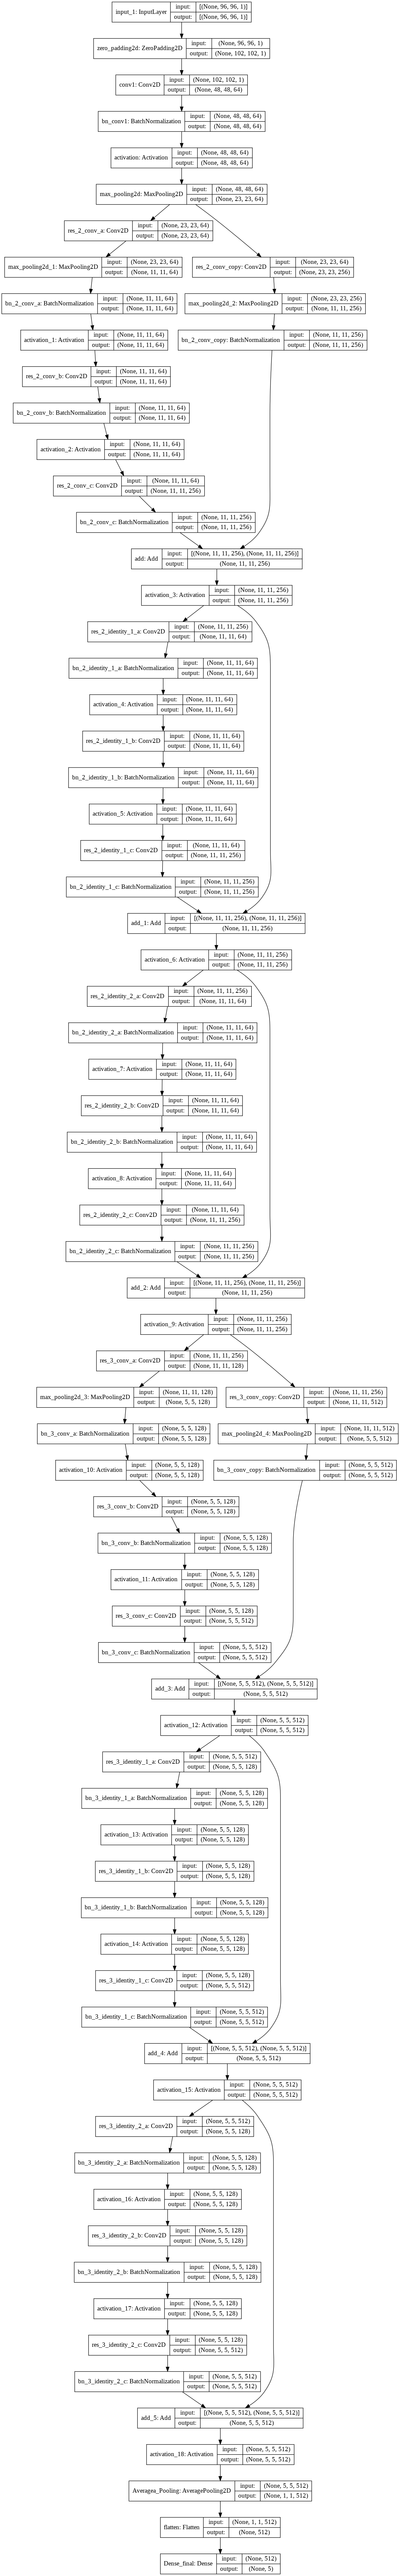

In [ ]:
#@title **Visualización del modelo**

plot_model(model_2_emotion, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
#@title **Entrenamiento y Callbacks (Solo 2 épocas para probar)**

# Entrenar la red 

#model_2_emotion.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

# Callbacks

#earlystopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20)
#checkpointer = ModelCheckpoint(filepath = "FacialExpression_weights.hdf5", verbose = 1, save_best_only=True)


#history = model_2_emotion.fit(train_datagen.flow(X_train, y_train, batch_size=64),
#	validation_data=(X_val, y_val), steps_per_epoch=len(X_train) // 64,
#	epochs= 2, callbacks=[checkpointer, earlystopping])

In [ ]:
#@title **Se carga el modelo entrenado con más épocas, pesos entrenados** (Cargarlos Manualmente)

!wget 'https://gitlab.com/gitlab-god/emotion-ai/-/raw/master/data/emotion.json'
!wget 'https://gitlab.com/gitlab-god/emotion-ai/-/raw/master/data/weights_emotions.hdf5'

with open('emotion.json', 'r') as json_file:
    json_savedModel= json_file.read()
    
# Cargamos la arquitectura del modelo
model_2_emotion = tf.keras.models.model_from_json(json_savedModel)
model_2_emotion.load_weights('weights_emotions.hdf5')
model_2_emotion.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])


--2021-10-13 21:55:06--  https://gitlab.com/gitlab-god/emotion-ai/-/raw/master/data/emotion.json
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34550 (34K) [text/plain]
Saving to: ‘emotion.json’

emotion.json        100%[===================>]  33.74K  --.-KB/s    in 0.002s  

2021-10-13 21:55:06 (18.6 MB/s) - ‘emotion.json’ saved [34550/34550]

--2021-10-13 21:55:07--  https://gitlab.com/gitlab-god/emotion-ai/-/raw/master/data/weights_emotions.hdf5
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14428800 (14M) [application/octet-stream]
Saving to: ‘weights_emotions.hdf5.1’

weights_emotions.hd 100%[===================>]  13.76M  24.9MB/s    in 0.6s    

2021-10

In [ ]:
#@title **Accuracy**
score = model_2_emotion.evaluate(X_Test, y_Test)
print('Accuracy en la fase de Test: {}'.format(score[1]))

39/39 [==============================] - 30s 19ms/step - loss: 0.3418 - accuracy: 0.8633
Accuracy en la fase de Test: 0.8633034825325012


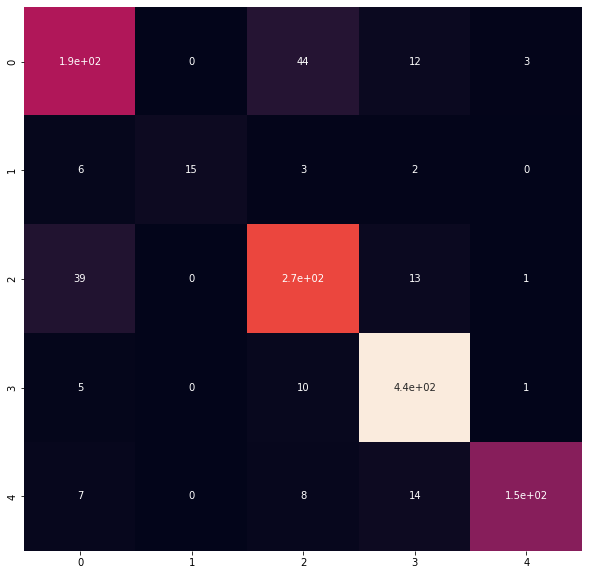

In [ ]:
#@title **Matriz de Confusión**

predicted_classes = np.argmax(model_2_emotion.predict(X_Test), axis=-1)
y_true = np.argmax(y_Test, axis=-1)
y_true.shape

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True, cbar = False)

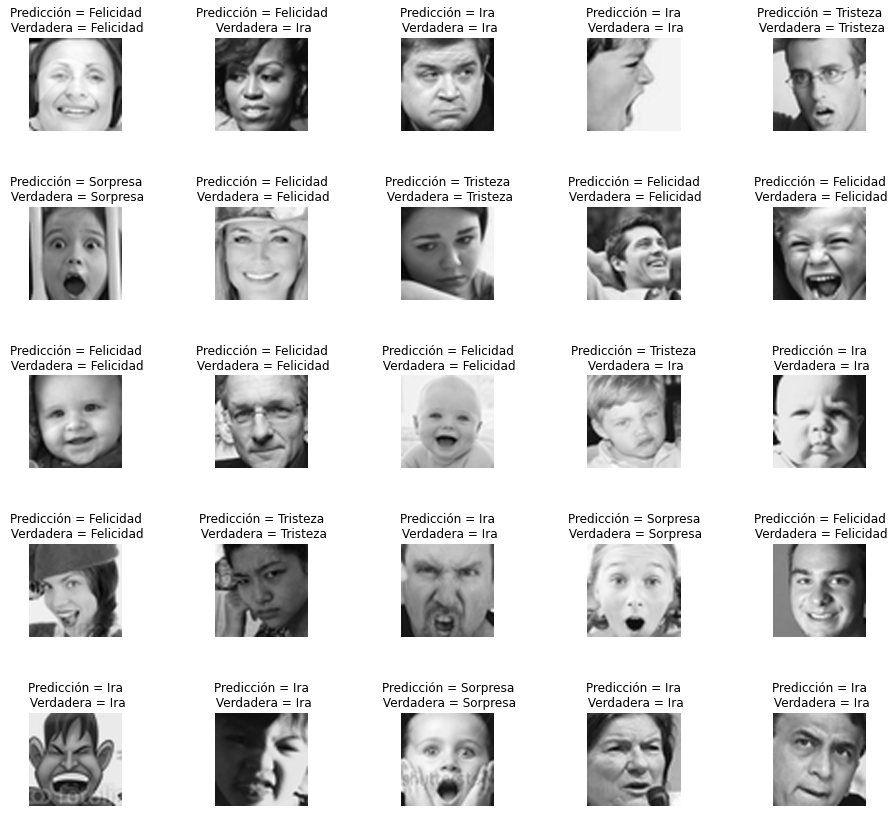

In [ ]:
#@title **Ejemplos de Clasificación**

label_to_text = {0:'Ira', 1:'Odio', 2:'Tristeza', 3:'Felicidad', 4: 'Sorpresa'}

L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (15, 15))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_Test[i].reshape(96,96), cmap = 'gray')
    axes[i].set_title('Predicción = {}\n Verdadera = {}'.format(label_to_text[predicted_classes[i]], label_to_text[y_true[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)   